In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## define dataset

In [23]:
x = np.linspace(0, 50, 51).reshape(-1, 1)
y = np.linspace(0, 50, 51)
y = y + 5

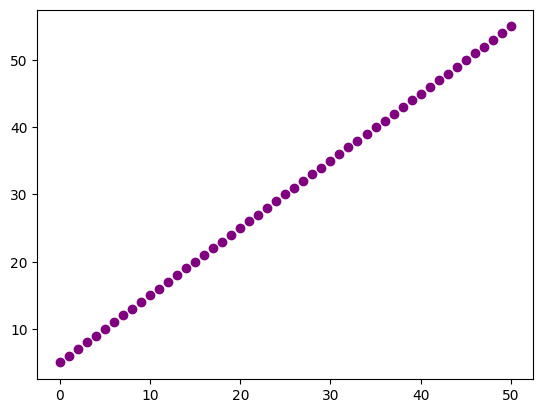

In [24]:
plt.scatter(x, y, color="purple")
plt.show()

## define model

In [25]:
mymodel = LinearRegression()
mymodel.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
s = mymodel.coef_[0]
i = mymodel.intercept_

print(f"slope : {s} | intercept : {i}")

slope : 1.0 | intercept : 5.0


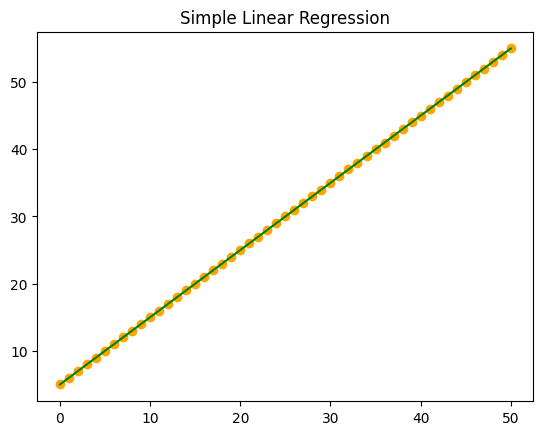

In [30]:
plt.scatter(x, y, color="orange")
plt.plot(x, s * x + i, color="green")
plt.title("Simple Linear Regression")
plt.show()

In [31]:
mymodel.predict([[25]])

array([30.])

In [32]:
mymodel.predict([[11], [1.25], [35]])

array([16.  ,  6.25, 40.  ])

## model evaluation